In [91]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [92]:
# read in the JSOn files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

Let's begin taking a look of a few rows of the <code>profile</code> dataset

In [93]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


We can see that there is some <code>NaN</code> values in a couple of columns, let's take a deeper look to the total number of null values in the dataset.

In [94]:
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

From above we can see that there are 2175 null values at <code>gender</code> and <code>income</code> features.

Now I'm going to analyze each of the <code>profile</code> features, starting with the <code>age</code> feature.

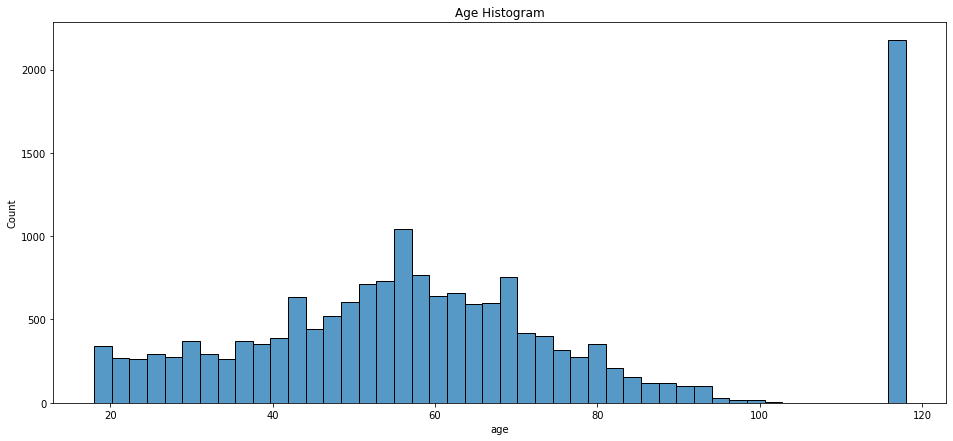

In [95]:
plt.figure(figsize=(16,7))
sns.histplot(data = profile, x = 'age')
plt.title('Age Histogram')
plt.show()

From the histogram plotted above we can see that it has the shape of a normal distribution, but also notice that at the right of the plot it has more than 2000 values for an age of 118 years old which doesn't seem very common. So it is a good idea to explore more deeply this dataframe

In [96]:
# Exploring the data where the age is different from 118
print('There are',str(profile.loc[profile['age'] != 118,'age'].value_counts().sum()),
      'rows with an age value different from 118')
profile.loc[profile['age'] != 118,:].isnull().sum()

There are 14825 rows with an age value different from 118


gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

The dataset where the age is different from 118 doesn't have null values. Now let's take a look at the dataframe where the age is 118

In [97]:
# Now Exploring the data where the age is 118 
print('There are',str(profile.loc[profile['age'] == 118,'age'].value_counts().tolist()[0]),
      'rows with an age value of 118')
profile.loc[profile['age'] == 118,:].isnull().sum()

There are 2175 rows with an age value of 118


gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

From above we can note that all the 2175 rows in wich age has a value of 118, also have null values at gender and income columns, this represents the 12.8% of the 17000 rows, and due to the lack of features where I can predict the gender, age and income (the only feature remaining is the date where the customer became a member) for these customers I decided to drop this rows and continue with the rest of the dataset for further analisys.

In [98]:
# First I will store in a dataframe the person id that i'm going to drop
dropped_id = profile.loc[profile['age']== 118, 'id'].tolist()

# Dropping the rows with null values which are the same with an age of 118 years old
profile.dropna(axis = 0, inplace = True)
print('There are', profile.shape[0],'rows left after dropping the null values')

There are 14825 rows left after dropping the null values


Now it is time to clean the data in the <code>profile</code> dataframe, lets begin with the <code>became_member_on</code> column that has the information of when the client created an app account and has a format of timestamp, so I'm going to transform it, because it will be more useful in a datetime format.

In [99]:
profile.loc[:,'became_member_on'] = pd.to_datetime(profile.became_member_on, format= '%Y%m%d')
profile.head()

,gender,age,id,became_member_on,income
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0


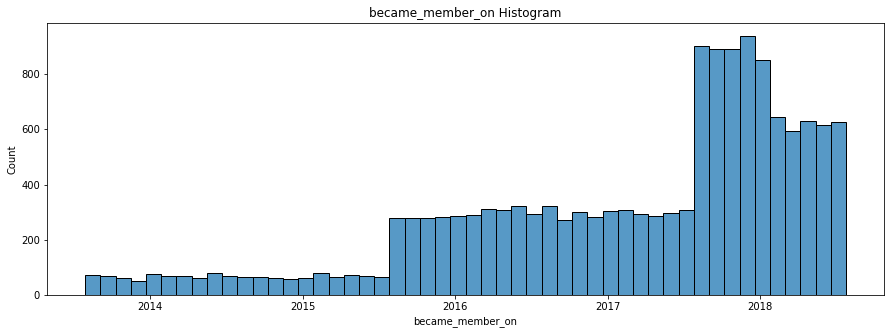

In [100]:
# Plotting the bocame_member_on feature histogram
plt.figure(figsize = (15,5))
sns.histplot(data = profile, x = 'became_member_on', bins = 50)
plt.title('became_member_on Histogram')
plt.show()

From above, we can see that there was a progressive increase in the number of new members year by year until the end of 2017, then since the beginning of 2018 the app presented a decrease of new members.

In [101]:
# Separating the day, month and year into different columns
profile.loc[:,'member_day'] = profile.became_member_on.apply(lambda x: x.day)
profile.loc[:,'member_month'] = profile.became_member_on.apply(lambda x: x.month)
profile.loc[:,'member_year'] = profile.became_member_on.apply(lambda x: x.year)
profile.head()

,gender,age,id,became_member_on,income,member_day,member_month,member_year
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,15,7,2017
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,9,5,2017
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,26,4,2018
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,9,2,2018
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,11,11,2017


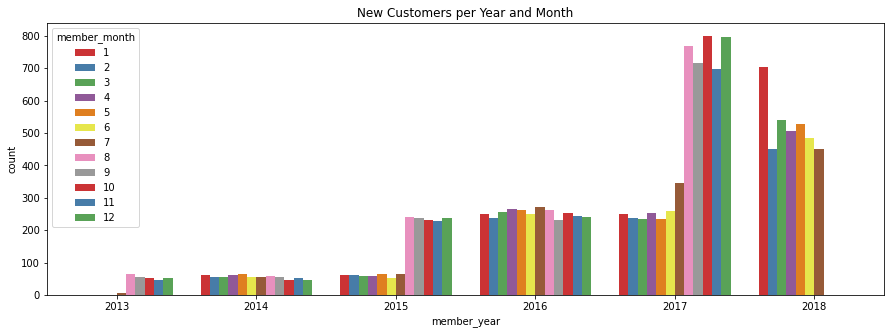

In [102]:
# Number of new clients per year and month
plt.figure(figsize = (15,5))
sns.countplot(data = profile, x = 'member_year', hue = 'member_month', palette = 'Set1')
plt.title('New Customers per Year and Month')
plt.show()

The countplot above shows us that in 2015 and 2017 there are a significant increase of new user after the 8th month (August) of the year, meanwhile the rest of the years does'not show a significant trend between months.

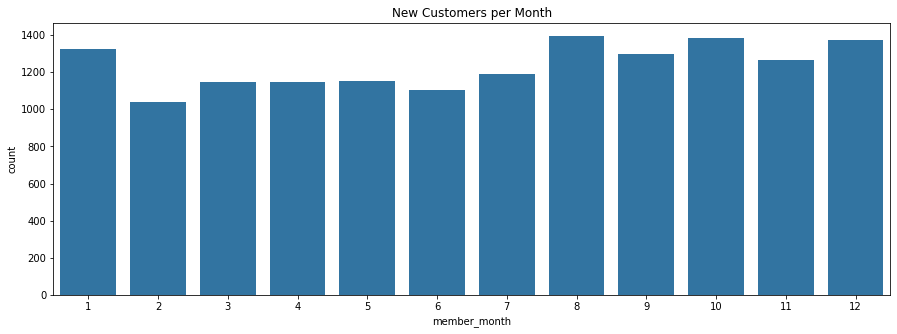

In [103]:
# Number of observations per month
plt.figure(figsize = (15,5))
sns.countplot(data = profile, x = 'member_month', color = 'tab:blue')
plt.title('New Customers per Month')
plt.show()

The plot above shows that in general there is not a very clear trend of the number of new users between months, but it is important to consider that the years 2013 and 2018 don't have data for all the month.

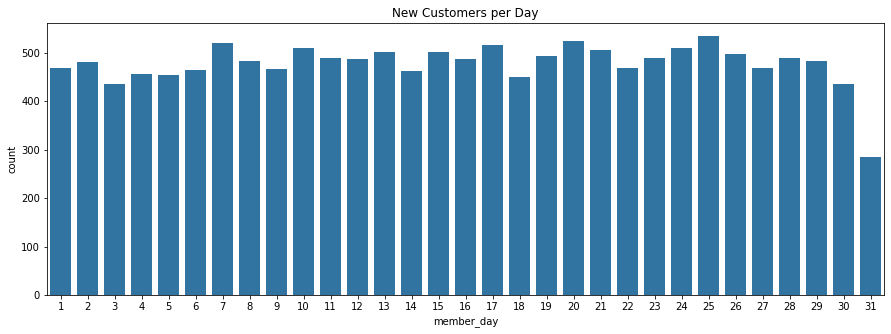

In [104]:
# Number of observations per day
plt.figure(figsize = (15,5))
sns.countplot(data = profile, x = 'member_day', color = 'tab:blue')
plt.title('New Customers per Day')
plt.show()

As with the plot of new customers by month, in the above plot there aren't trends that indicates that people used to become a member more on certain days than others.

Looking at gender feature

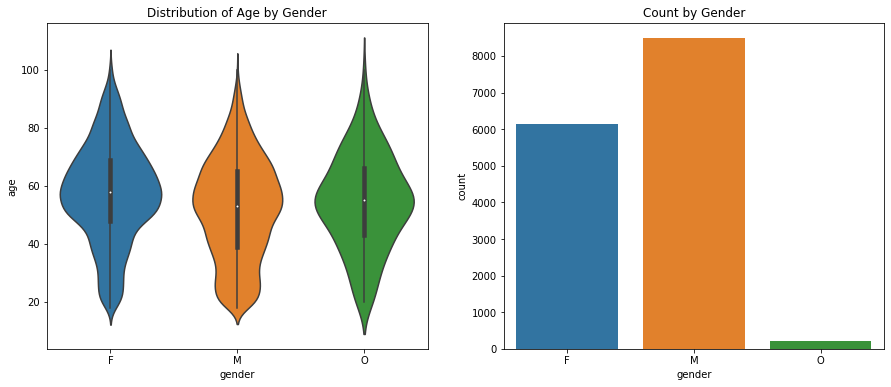

In [105]:
# Analyzing the distribution of ages by gender
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (15,6))
sns.violinplot(ax = ax1, data = profile, x = 'gender',y= 'age')
ax1.set_title('Distribution of Age by Gender')
sns.countplot(ax = ax2, data = profile, x = 'gender')
ax2.set_title('Count by Gender')
plt.show()

The violin plot (that is not scaled by the number of observations of each category) shows that all gender categories have a normal distribution of the data. From the count plot on the right is clear that most observations at gender feature are male, and it is important to note that the number of observations for <code>other</code> genders are a lot less than for <code>Male</code> and <code>Female</code>

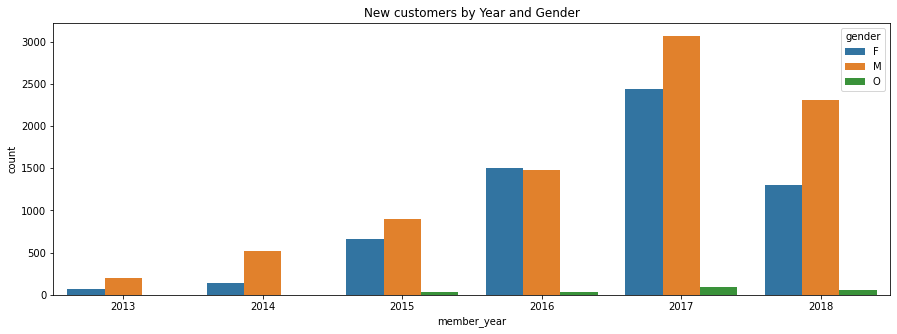

In [106]:
plt.figure(figsize = (15,5))
sns.countplot(data = profile, x = 'member_year', hue = 'gender')
plt.title('New customers by Year and Gender')
plt.show()

The above plot shows us that the number of male, female and other gender of the new customers through the years have a very similar behaviour between them, and follows the scale of the previous plot that showed more male than female new customers, except in 2016 when there was more new female than new male customers.

Income Feature:

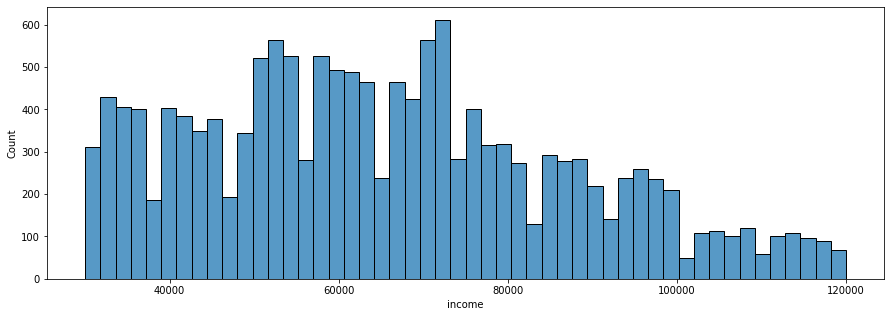

In [107]:
plt.figure(figsize = (15,5))
sns.histplot(data = profile, x = 'income', bins = 50)
plt.show()

The income feature histogram doesn't look like a normal distribution, but I think it make sense that there are few people with a very high income, and a lot with a low and middle income.
Now i'm going to analyze the behaviour of the income considering other features as well.

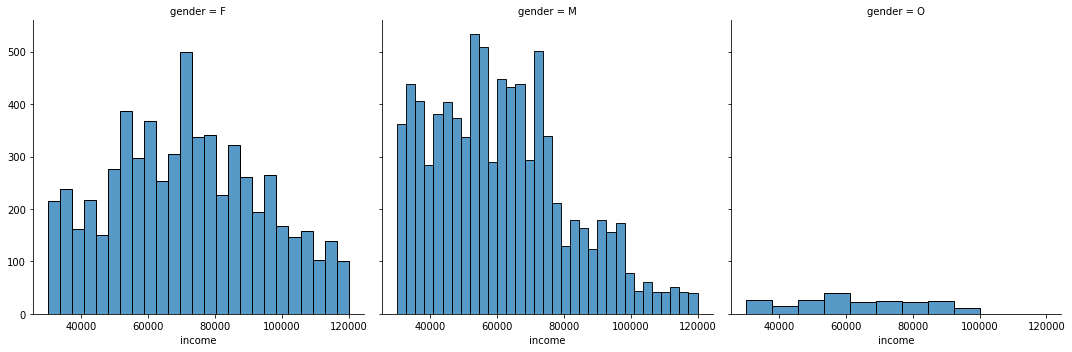

In [108]:
# Plotting income by gender
sns.FacetGrid(data = profile,
              col = 'gender',              
              height = 5
             ).map(sns.histplot,'income')

Considering the income by gender it is clear that the amount of women that earn more than 80.000 is higher than men, specially in the range between 100.000 and 120.000, taking into account that there are more male than female users. For the other hand most low-income users are men, and for the other gender the income level is almost uniform from the lowest income to 100.000.

Now we consider an additional feature like the year the user became a member, to see the behaviour of the income through the years.

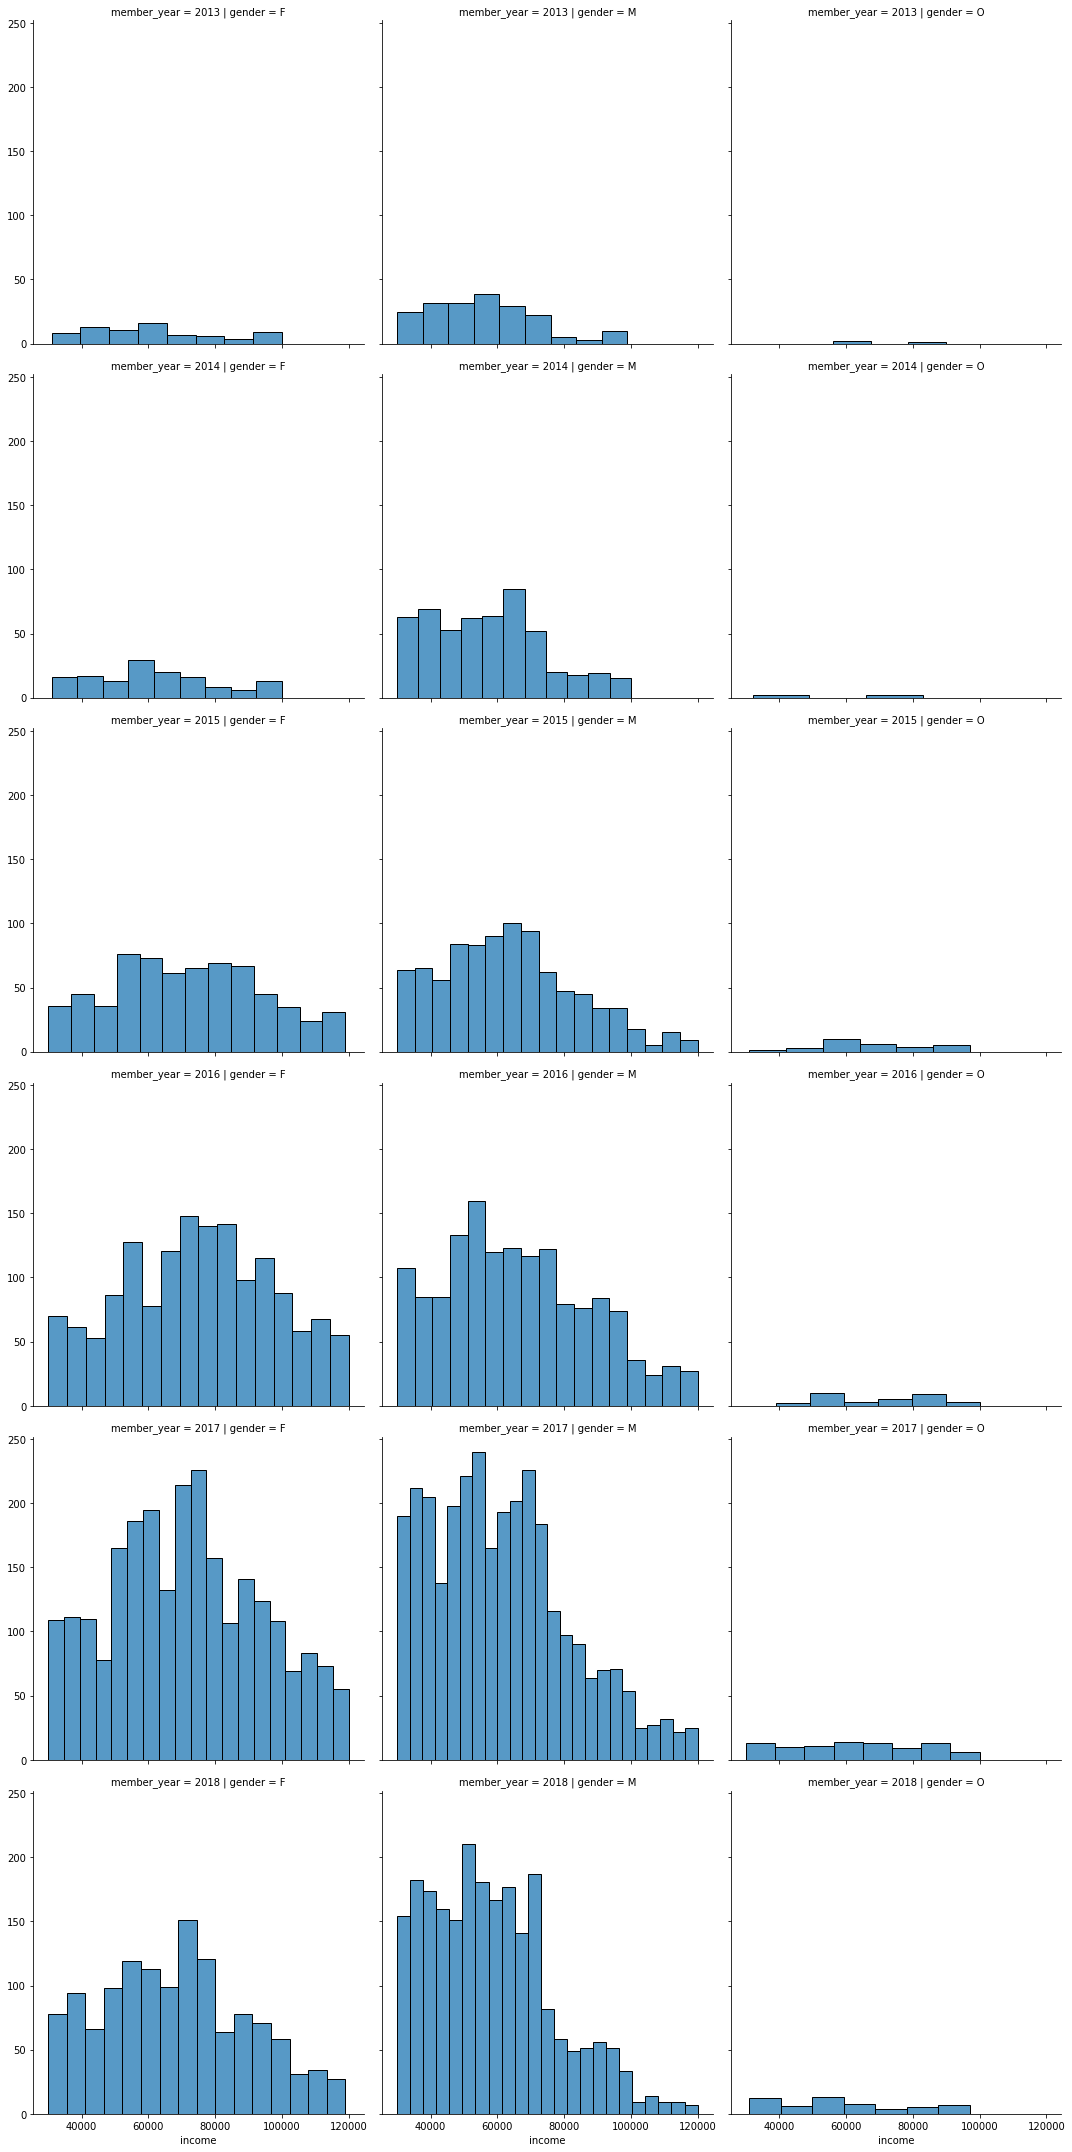

In [109]:
# Plotting income by gender and year
sns.FacetGrid(data = profile,
              col = 'gender',
              row = 'member_year',
              height = 5
             ).map(sns.histplot,'income')

We can see that there is no trigger year for high level income of female users, and in general the income pattern is very similar year after year for all genders considering the number of observation that we have for each gender in each year.

In [110]:
profile.head()

,gender,age,id,became_member_on,income,member_day,member_month,member_year
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,15,7,2017
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,9,5,2017
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,26,4,2018
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,9,2,2018
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,11,11,2017


Now to have only numerical variables in our <code>profile</code> dataset I'm going to convert the categorical <code>gender</code> into dummy variables.

In [111]:
gender_dummies = pd.get_dummies(profile.gender, prefix = 'gender')
profile = pd.concat([profile,gender_dummies], axis = 1).drop(['became_member_on'], axis = 1)
profile.head()

,gender,age,id,income,member_day,member_month,member_year,gender_F,gender_M,gender_O
1,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,15,7,2017,1,0,0
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,9,5,2017,1,0,0
5,M,68,e2127556f4f64592b11af22de27a7932,70000.0,26,4,2018,0,1,0
8,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,9,2,2018,0,1,0
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,11,11,2017,0,1,0


**Portfolio dataset**

In [112]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [113]:
# Looking up for null values at portfolio dataset
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

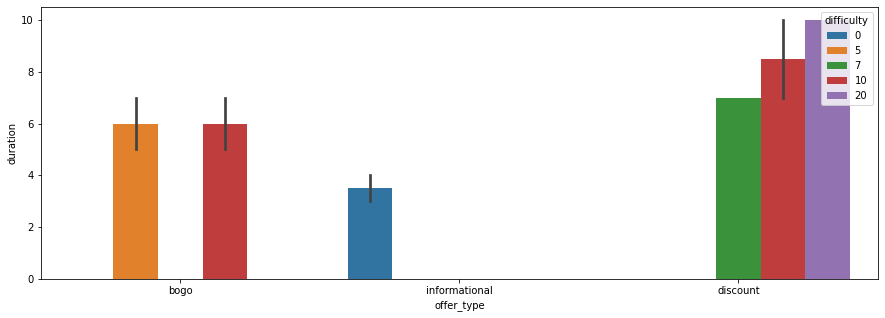

In [114]:
# 
plt.figure(figsize = (15,5))
sns.barplot(data = portfolio, x= 'offer_type', y= 'duration', hue = 'difficulty')
plt.show()

From above, we can see that there are three types of offer, and the offer with the wider range of parameter variations is the <code>discount</code> one, which has three difficulty values between 7 and 20, and the duration for this offer goes from 7 to 10, the <code>bogo</code> offer has only two difficulty with two duration values for each one, and finally the <code>informational</code> offer type does not have a difficulty value and has the lower duration range that goes from 3 to 4.

In [115]:
# Getting the unique combination of channels
portfolio.channels.astype(str).unique()

array(["['email', 'mobile', 'social']",
       "['web', 'email', 'mobile', 'social']",
       "['web', 'email', 'mobile']", "['web', 'email']"], dtype=object)

There are 4 channels in the portfolio dataframe: email, mobile, social, web, so I'm going to create one column for each of them and indicate with a 1 if the offer was present on that channel and a 0 if it wasn't.

In [116]:
channels = ['email','mobile','social','web']
for channel in channels:
    portfolio[channel] = portfolio.channels.apply(lambda x: int(1) if channel in x else int(0))

# Dropping the channels column
portfolio.drop(['channels'], axis = 1, inplace = True)

In [117]:
portfolio.head()

,reward,difficulty,duration,offer_type,id,email,mobile,social,web
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1


In [118]:
# Getting the unique values in the offer_type column
portfolio.offer_type.unique()

array(['bogo', 'informational', 'discount'], dtype=object)

Since there are three categorical variables <code>bogo</code>, <code>informational</code> and <code>discount</code>, I'm going to perform a One-Hot Encoding using dummy variables.

In [119]:
# Getting the dummy variables for the offer_type feature
offer_type_dummies = pd.get_dummies(portfolio.offer_type)
portfolio = pd.concat([portfolio,offer_type_dummies], axis = 1)
portfolio.head(30)

,reward,difficulty,duration,offer_type,id,email,mobile,social,web,bogo,discount,informational
0,10,10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,1,1,1,0,1,0,0
1,10,10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,1,1,1,1,1,0,0
2,0,0,4,informational,3f207df678b143eea3cee63160fa8bed,1,1,0,1,0,0,1
3,5,5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,1,1,0,1,1,0,0
4,5,20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,1,0,0,1,0,1,0
5,3,7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2,1,1,1,1,0,1,0
6,2,10,10,discount,fafdcd668e3743c1bb461111dcafc2a4,1,1,1,1,0,1,0
7,0,0,3,informational,5a8bc65990b245e5a138643cd4eb9837,1,1,1,0,0,0,1
8,5,5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d,1,1,1,1,1,0,0
9,2,10,7,discount,2906b810c7d4411798c6938adc9daaa5,1,1,0,1,0,1,0


**Transcript**

In [120]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [121]:
# Looking up for null values at transcript dataset
transcript.isnull().sum()

person    0
event     0
value     0
time      0
dtype: int64

In [122]:
transcript.shape

(306534, 4)

In [123]:
transcript['person'].isin(dropped_id).sum()

33772

In [124]:
transcript = transcript.loc[~transcript['person'].isin(dropped_id),:]
transcript.shape

(272762, 4)

In [125]:
# Getting the unique values of events in the transcript DF
transcript.event.unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

As we can see, the events can be divided in two groups, on the one hand we have different states of the offer, and on the other hand we have the transaction information, considering this I'm going to create a DataFrame for each of the mencioned groups

In [126]:
# DataFrame containing the transaction information
transaction_df = transcript[transcript.event == 'transaction']
transaction_df.head()

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0


In [127]:
# Dataframe containing the different states of the offer
offer_events_df = transcript[transcript.event != 'transaction']
offer_events_df.shape

(148805, 4)

Now I'm going to extract the key of the dictionary from the value column, and put it in a new column, this is to make it easy to know the different key values that the events could have.

In [128]:
offer_events_df.loc[:,'Value_keys'] = offer_events_df.value.apply(lambda x: list(x.keys())[0])

In [129]:
offer_events_df.head()

,person,event,value,time,Value_keys
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,offer id
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0,offer id
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id


In [130]:
# Getting the unique values of the Value_keys column
offer_events_df['Value_keys'].unique()

array(['offer id', 'offer_id'], dtype=object)

It is time to extract the values of the <code>value</code> column dictionaries considering the above two unique keys <code>'offer id'</code> and <code>'offer_id'</code> for the <code>offer_events_df</code>, and the <code>'amount'</code> key for the <code>transaction_df</code>; and putting them in a new column

In [131]:
offer_events_df.loc[:,'offer_id'] = offer_events_df.value.apply(lambda x: x.get('offer id') 
                                                                if x.get('offer id') is not None 
                                                                else x.get('offer_id'))

In [132]:
transaction_df.loc[:,'amount'] = transaction_df.value.apply(lambda x: x.get('amount'))

In [133]:
# Dropping the columns that I don't need anymore 
offer_events_df.drop(['value','Value_keys'], axis = 1, inplace = True)
transaction_df.drop(['value'], axis = 1, inplace = True) 

In [134]:
transaction_df.head()

,person,event,time,amount
12654,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56
12659,54890f68699049c2a04d415abc25e717,transaction,0,13.23
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97


In [135]:
offer_events_df.head()

,person,event,time,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,e2127556f4f64592b11af22de27a7932,offer received,0,2906b810c7d4411798c6938adc9daaa5
5,389bc3fa690240e798340f5a15918d5c,offer received,0,f19421c1d4aa40978ebb69ca19b0e20d
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,0,3f207df678b143eea3cee63160fa8bed
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,0,0b1e1539f2cc45b7b9fa7c272da2e1d7


In [138]:
# Get the duplicated registers
offer_events_df.loc[offer_events_df.duplicated(keep='first'),:]

,person,event,time,offer_id
66123,3dde94fa581145cb9f206624f1a94d5a,offer completed,168,2906b810c7d4411798c6938adc9daaa5
66783,e9fb6ed2cecb4980ba98c86abc9c91e3,offer completed,168,ae264e3637204a6fb9bb56bc8210ddfd
67614,a7dc060f6fc94ca7bf71fbb188187dca,offer completed,168,9b98b8c7a33c4b65b9aebfe6a799e6d9
68562,30478a4c1e884a63a822aa87b833ed7a,offer completed,168,2298d6c36e964ae4a3e7e9706d1fb8c2
69218,84fb57a7fe8045a8bf6236738ee73a0f,offer completed,168,ae264e3637204a6fb9bb56bc8210ddfd
...,...,...,...,...
297625,6ba2450a438540999e633a5d99c7c7a0,offer completed,672,9b98b8c7a33c4b65b9aebfe6a799e6d9
299471,f39fe7ea4e5946378e6d224504b77797,offer completed,684,0b1e1539f2cc45b7b9fa7c272da2e1d7
304756,0785f1fce0b04ba08e01c7d2ebab4917,offer completed,708,0b1e1539f2cc45b7b9fa7c272da2e1d7
305551,b7e216b6472b46648272c29a52a86702,offer completed,714,fafdcd668e3743c1bb461111dcafc2a4


There are 374 rows that are a duplicated register, we are going to drop these rows because does not have much sense that a person completed the same offer twice at the same time.

In [139]:
# Dropping the duplicated registers
offer_events_df = offer_events_df.loc[~offer_events_df.duplicated(keep='first'),:]

Now I think it's important to count the number events for each offer to detect some anomalies

In [141]:
count_offer_events = pd.crosstab(offer_events_df.offer_id, offer_events_df.event)
count_offer_events = count_offer_events.merge(right = portfolio.loc[:,['id','offer_type']], left_on = 'offer_id',
                                              right_on = 'id')
count_offer_events

,offer completed,offer received,offer viewed,id,offer_type
0,3306,6726,2215,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount
1,4847,6655,6379,2298d6c36e964ae4a3e7e9706d1fb8c2,discount
2,3860,6631,3460,2906b810c7d4411798c6938adc9daaa5,discount
3,0,6657,3487,3f207df678b143eea3cee63160fa8bed,informational
4,3281,6593,6329,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo
5,0,6643,5873,5a8bc65990b245e5a138643cd4eb9837,informational
6,4141,6685,3499,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo
7,3604,6683,5901,ae264e3637204a6fb9bb56bc8210ddfd,bogo
8,4074,6576,6310,f19421c1d4aa40978ebb69ca19b0e20d,bogo
9,4957,6652,6407,fafdcd668e3743c1bb461111dcafc2a4,discount


The informational offers records don't have any completed event, this is because the informational offers don't have a difficulty value, so we need a way to meassure if a transaction was influenced by the informational offer before the end of the duration time of the offer, I will do this later after some processing needed.

In [142]:
# Making a pivot table to get the number of times the same offer was received, viewed and completed by each person
pivot_offer_count_df = pd.pivot_table(data=offer_events_df, 
                                index=['person','offer_id'], 
                                columns=['event'], 
                                values='time',
                                aggfunc = 'count'
                               ).rename_axis(None, axis = 'columns').reset_index()
pivot_offer_count_df = pivot_offer_count_df[['person','offer_id','offer received','offer viewed', 'offer completed']]
pivot_offer_count_df

,person,offer_id,offer received,offer viewed,offer completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,NaN,1.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,1.0,NaN
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,1.0,1.0
...,...,...,...,...,...
55217,fffad4f4828548d1b5583907f2e9906b,f19421c1d4aa40978ebb69ca19b0e20d,2.0,2.0,2.0
55218,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,1.0,1.0
55219,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3.0,3.0,3.0
55220,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,1.0


In [143]:
# Number of times completed offers in the original offer events data for each person and each offer
pivot_offer_count_df['offer completed'].value_counts()

1.0    24112
2.0     3549
3.0      264
4.0       17
Name: offer completed, dtype: int64

In [144]:
# Null values in the pivot table
pivot_offer_count_df.isnull().sum()

person                 0
offer_id               0
offer received         0
offer viewed       12729
offer completed    27280
dtype: int64

From above 12729 received offers weren't viewed and 27280 weren't completed.

Now I'm going to consider the times of the events that occured for each offer and person.

In [145]:
# Making a pivot table to get the time of each offer event by each offer id and person
pivot_offer_time_df = pd.pivot_table(data=offer_events_df, 
                                index=['person','offer_id'], 
                                columns=['event'], 
                                values='time',                                
                               ).rename_axis(None, axis = 'columns').reset_index()
pivot_offer_time_df = pivot_offer_time_df[['person', 'offer_id', 'offer received', 'offer viewed', 'offer completed']]
pivot_offer_time_df

,person,offer_id,offer received,offer viewed,offer completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,576.0,NaN,576.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,336.0,372.0,NaN
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,168.0,192.0,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,408.0,456.0,414.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,504.0,540.0,528.0
...,...,...,...,...,...
55217,fffad4f4828548d1b5583907f2e9906b,f19421c1d4aa40978ebb69ca19b0e20d,204.0,258.0,276.0
55218,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,168.0,174.0,198.0
55219,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,440.0,450.0,458.0
55220,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,504.0,534.0,504.0


From the pivot table <code>pivot_offer_count_df</code> we can see that there are some offers that were sent more that once to some customers, and for this combination of offers and customers, the second pivot table <code>pivot_offer_time_df</code> is having trouble because the time values of the events for each offer and person are being aggregated, which don't allow us to get the real time of the events. A solution for this is to generate a variable that indicates me if it is the first time, second time, and so on, that this offer event occurred for that person.

I'll start by dividing the <code>offer_events_df</code> dataframe into two sets, the first one will contain the rows with the events of offers that were sent just one time to the respective customer, and the second one will be processed to put in a new column the number of times that each event of the offer has ocurred.

In [146]:
# Dataframe that contain the offers that were sent "jot" for "just one time"
pivot_offer_count_jot_df = pivot_offer_count_df.loc[(pivot_offer_count_df['offer received'] == 1),:] 
pivot_offer_count_jot_df

,person,offer_id,offer received,offer viewed,offer completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,NaN,1.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,1.0,NaN
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,1.0,1.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,1.0,1.0
...,...,...,...,...,...
55215,fffad4f4828548d1b5583907f2e9906b,5a8bc65990b245e5a138643cd4eb9837,1.0,1.0,NaN
55216,fffad4f4828548d1b5583907f2e9906b,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,1.0
55218,ffff82501cea40309d5fdd7edcca4a07,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,1.0,1.0
55220,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,1.0,1.0


In [147]:
# Getting a list of [person,offer_id] of the pivot table that were offered just one time
B = pivot_offer_count_jot_df.loc[:,['person','offer_id']].values.tolist()

In [148]:
# Getting a list of [person,offer_id] of all records in the offer events dataframe 
A = offer_events_df.loc[:, ['person','offer_id']].values.tolist()

In [149]:
# Pairing the [person,offer_id] that were offered just one time with the base of offered events dataframe
# to obtain a list of booleans that will be useful to filter the corresponding rows
offer_events_filter = [x in B for x in A]

In [150]:
# Putting an int value in a new column 'n_times' to indicate that the filtered dataframe corresponds to offers 
# sent just one time to that person
offer_events_df.loc[np.array(offer_events_filter),'n_times'] = 1

In [71]:
def count_offers(offer_events_df):
    '''
    Function that counts the number of times that the same offer events are present on each person
    input:
    offer_events_df: Dataframe that contains columns for a person id, offer id, event and time of the event.
    Output:
    df: Dataframe that contains an aditional column with the number of times that event is present for that person an offer_id
    '''
    
    # Getting a list of the persons id
    persons = offer_events_df.person.unique().tolist()
    df = pd.DataFrame({'person': [],
                    'event':[],
                    'time':[],
                    'offer_id':[],
                     'n_times':[]})
    
    # Loop to iterate over the person id
    for person in persons:  
        # Getting a list of the offers ids
        offers = offer_events_df.loc[offer_events_df.person == person,'offer_id'].unique().tolist()
        
        # Loop to iterate over the offer id
        for offer in offers:
            
            # Subset of the dataframe that filters the current iteration's person and offer_id
            offer_events_temp = offer_events_df.loc[(offer_events_df.person == person) 
                                                    & (offer_events_df.offer_id == offer),:]
            event_list = [] # list to store the event of the current row
            i = 1 # Integer that indicates the number of times the events are present
            
            # loop to iterate over the rows of the subset dataframe
            for row in offer_events_temp.itertuples():            
                if row.event not in event_list:
                    event_list.append(row.event)

                    temp = pd.DataFrame(
                        {'person': [person],
                            'event':[row.event],
                            'time':[row.time],
                            'offer_id':[offer],
                            'n_times':[i]
                           }, index = [row.Index])
                    df = pd.concat([df,temp])
                else:
                    i+=1
                    event_list=[]
                    event_list.append(row.event)

                    temp = pd.DataFrame(
                        {'person': [person],
                            'event':[row.event],
                            'time':[row.time],
                            'offer_id':[offer],
                            'n_times':[i]
                           }, index = [row.Index])
                    df = pd.concat([df,temp])

    return df

In [152]:
# Dataframe resulting of applying the above function
#df = count_offers(offer_events_df.loc[~np.array(offer_events_filter),:])

In [153]:
# Due to the high resource consuming function, it is better to save the resulting dataframe to a csv file to avoid
# executing it every time we use the notebook
#df.to_csv('event_offer_count_mto_df.csv')

In [154]:
# Reading the dataframe that has the information of the offers that were sent more than once to a customer
df = pd.read_csv('event_offer_count_mto_df.csv', index_col = 0)

In [155]:
df.head()

,person,event,time,offer_id,n_times
5,389bc3fa690240e798340f5a15918d5c,offer received,0.0,f19421c1d4aa40978ebb69ca19b0e20d,1.0
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,0.0,f19421c1d4aa40978ebb69ca19b0e20d,1.0
32626,389bc3fa690240e798340f5a15918d5c,offer completed,60.0,f19421c1d4aa40978ebb69ca19b0e20d,1.0
201577,389bc3fa690240e798340f5a15918d5c,offer received,504.0,f19421c1d4aa40978ebb69ca19b0e20d,2.0
214275,389bc3fa690240e798340f5a15918d5c,offer viewed,504.0,f19421c1d4aa40978ebb69ca19b0e20d,2.0


In [156]:
# Concatenating both dataframes
offer_events_df = pd.concat([df, offer_events_df.loc[np.array(offer_events_filter),:]])
offer_events_df

,person,event,time,offer_id,n_times
5,389bc3fa690240e798340f5a15918d5c,offer received,0.0,f19421c1d4aa40978ebb69ca19b0e20d,1.0
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,0.0,f19421c1d4aa40978ebb69ca19b0e20d,1.0
32626,389bc3fa690240e798340f5a15918d5c,offer completed,60.0,f19421c1d4aa40978ebb69ca19b0e20d,1.0
201577,389bc3fa690240e798340f5a15918d5c,offer received,504.0,f19421c1d4aa40978ebb69ca19b0e20d,2.0
214275,389bc3fa690240e798340f5a15918d5c,offer viewed,504.0,f19421c1d4aa40978ebb69ca19b0e20d,2.0
...,...,...,...,...,...
306483,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,714.0,5a8bc65990b245e5a138643cd4eb9837,1.0
306490,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,714.0,3f207df678b143eea3cee63160fa8bed,1.0
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,714.0,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,714.0,fafdcd668e3743c1bb461111dcafc2a4,1.0


In [166]:
# Making a pivot table to have the times of each events of each offer sent to the customer
offers_times_df = pd.pivot_table(data=offer_events_df, 
                               index=['person','offer_id','n_times'], 
                               columns=['event'], 
                               values='time',
                              ).rename_axis(None, axis = 'columns').reset_index()
offers_times_df = offers_times_df.loc[:,['person','offer_id','n_times','offer received','offer viewed','offer completed']]
offers_times_df

,person,offer_id,n_times,offer received,offer viewed,offer completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,168.0,192.0,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,408.0,456.0,414.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,504.0,540.0,528.0
...,...,...,...,...,...,...
66565,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1.0,336.0,354.0,384.0
66566,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,2.0,408.0,414.0,414.0
66567,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3.0,576.0,582.0,576.0
66568,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,504.0,534.0,504.0


Now I want to merge the portfolio information with the offer times dataframe to get information about the relation of the offer type and the original offer completed events feature.

In [167]:
# Merging the portfolio information with the offer times dataframe
offers_times_df = offers_times_df.merge(portfolio, how = 'left', left_on = 'offer_id', right_on = 'id'
                                        ).drop(['id'], axis = 1)
offers_times_df

,person,offer_id,n_times,offer received,offer viewed,offer completed,reward,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,2,10,7,discount,1,1,0,1,0,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0,0,4,informational,1,1,0,1,0,0,1
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,168.0,192.0,NaN,0,0,3,informational,1,1,1,0,0,0,1
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,408.0,456.0,414.0,5,5,5,bogo,1,1,1,1,1,0,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,504.0,540.0,528.0,2,10,10,discount,1,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66565,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1.0,336.0,354.0,384.0,2,10,7,discount,1,1,0,1,0,1,0
66566,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,2.0,408.0,414.0,414.0,2,10,7,discount,1,1,0,1,0,1,0
66567,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3.0,576.0,582.0,576.0,2,10,7,discount,1,1,0,1,0,1,0
66568,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,504.0,534.0,504.0,5,5,7,bogo,1,1,0,1,1,0,0


In [168]:
# Counting the number of completed events of each offer type
offers_times_df.groupby(['offer_type'])['offer completed'].count()

offer_type
bogo             15100
discount         16970
informational        0
Name: offer completed, dtype: int64

We note that the informational offers don't have any completed event register, this is because this type of offers have a difficulty of 0, so there is no amount of transactions that would make the offer complete, but we can classify which transactions were made under the "influence" of the informational offer considering the time of duration of the offer since the time of the offere were received.

In the above <code>offers_times_df</code> dataframe we can see that there are records that have a time for a received and completed event but don't have a time register of the viewed event, which indicates that these offers weren't really completed. As in the initial information of the transcript data, the <code>offer completed</code> event only ensures that the money spent on transactions of the customer were enough to complete the offer <code>difficulty</code> and that those transactions were done before the <code>duration</code> time, even if the customer didn't see the offer. these and other conditions are present in the data, so I need to classify the records that were completed correctly and which were not.
The conditions to classify the records are the next ones:
* The offer that was never seen by the customer (<code>offer viewed</code> with a null value)
* The offer where the customer failed to reach the transaction <code>difficulty</code> on the <code>duration</code> time (<code>offer completed</code> with a null value on discount and BOGO offers)
* (<code>offer viewed</code> - <code>offer received</code>) > 0 y (<code>offer completed</code> - <code>offer viewed</code>) > 0: With this two conditions we can guarantee that the offer was not viewed after "completed" it.

In [169]:
# Giving a value of 0 to the offers that does not have a time record for a viewed event
offers_times_df.loc[offers_times_df['offer viewed'].isnull(),'true_completed'] = 0

# Giving a value of 0 to the BOGO and discount offers with a null value for the completed event
offers_times_df.loc[(offers_times_df['offer completed'].isnull()) &
                    (offers_times_df['offer_type'] == 'bogo')
                    ,'true_completed'] = 0

offers_times_df.loc[(offers_times_df['offer completed'].isnull()) &
                    (offers_times_df['offer_type'] == 'discount')
                    ,'true_completed'] = 0
offers_times_df.head()

,person,offer_id,n_times,offer received,offer viewed,offer completed,reward,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational,true_completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,2,10,7,discount,1,1,0,1,0,1,0,0.0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0,0,4,informational,1,1,0,1,0,0,1,NaN
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,168.0,192.0,NaN,0,0,3,informational,1,1,1,0,0,0,1,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,408.0,456.0,414.0,5,5,5,bogo,1,1,1,1,1,0,0,NaN
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,504.0,540.0,528.0,2,10,10,discount,1,1,1,1,0,1,0,NaN


In [170]:
# Computing the times between offer events
offers_times_df['dt_rec_view'] = offers_times_df.loc[:,'offer viewed'] - offers_times_df.loc[:,'offer received']
offers_times_df['dt_view_comp'] = offers_times_df.loc[:,'offer completed'] - offers_times_df.loc[:,'offer viewed']
offers_times_df

,person,offer_id,n_times,offer received,offer viewed,offer completed,reward,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational,true_completed,dt_rec_view,dt_view_comp
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,2,10,7,discount,1,1,0,1,0,1,0,0.0,NaN,NaN
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0,0,4,informational,1,1,0,1,0,0,1,NaN,36.0,NaN
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,168.0,192.0,NaN,0,0,3,informational,1,1,1,0,0,0,1,NaN,24.0,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,408.0,456.0,414.0,5,5,5,bogo,1,1,1,1,1,0,0,NaN,48.0,-42.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,504.0,540.0,528.0,2,10,10,discount,1,1,1,1,0,1,0,NaN,36.0,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66565,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1.0,336.0,354.0,384.0,2,10,7,discount,1,1,0,1,0,1,0,NaN,18.0,30.0
66566,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,2.0,408.0,414.0,414.0,2,10,7,discount,1,1,0,1,0,1,0,NaN,6.0,0.0
66567,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3.0,576.0,582.0,576.0,2,10,7,discount,1,1,0,1,0,1,0,NaN,6.0,-6.0
66568,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,504.0,534.0,504.0,5,5,7,bogo,1,1,0,1,1,0,0,NaN,30.0,-30.0


Classifying records based on time between events for BOGO and discount offers

In [171]:
# With positive times between both events we can classify these as true completed offer
offers_times_df.loc[(offers_times_df['dt_rec_view'] >= 0) &
                    (offers_times_df['dt_view_comp'] >= 0) &
                    (offers_times_df['offer_type'] == 'bogo') &
                    (offers_times_df['true_completed'].isnull())
                  , 'true_completed'] = 1
offers_times_df.loc[(offers_times_df['dt_rec_view'] >= 0) &
                    (offers_times_df['dt_view_comp'] >= 0) &
                    (offers_times_df['offer_type'] == 'discount') &
                    (offers_times_df['true_completed'].isnull())
                  , 'true_completed'] = 1

# With either of the two negative times between both events we can classify these as an uncompleted offer
offers_times_df.loc[(offers_times_df['dt_rec_view'] < 0) |
                    (offers_times_df['dt_view_comp'] < 0) &
                    (offers_times_df['offer_type'] == 'bogo') &
                    (offers_times_df['true_completed'].isnull())
                  , 'true_completed'] = 0
offers_times_df.loc[(offers_times_df['dt_rec_view'] < 0) |
                    (offers_times_df['dt_view_comp'] < 0) &
                    (offers_times_df['offer_type'] == 'discount') &
                    (offers_times_df['true_completed'].isnull())
                  , 'true_completed'] = 0

In [172]:
offers_times_df

,person,offer_id,n_times,offer received,offer viewed,offer completed,reward,difficulty,duration,offer_type,email,mobile,social,web,bogo,discount,informational,true_completed,dt_rec_view,dt_view_comp
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,2,10,7,discount,1,1,0,1,0,1,0,0.0,NaN,NaN
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0,0,4,informational,1,1,0,1,0,0,1,NaN,36.0,NaN
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,168.0,192.0,NaN,0,0,3,informational,1,1,1,0,0,0,1,NaN,24.0,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,408.0,456.0,414.0,5,5,5,bogo,1,1,1,1,1,0,0,0.0,48.0,-42.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,504.0,540.0,528.0,2,10,10,discount,1,1,1,1,0,1,0,0.0,36.0,-12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66565,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1.0,336.0,354.0,384.0,2,10,7,discount,1,1,0,1,0,1,0,1.0,18.0,30.0
66566,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,2.0,408.0,414.0,414.0,2,10,7,discount,1,1,0,1,0,1,0,1.0,6.0,0.0
66567,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3.0,576.0,582.0,576.0,2,10,7,discount,1,1,0,1,0,1,0,0.0,6.0,-6.0
66568,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,504.0,534.0,504.0,5,5,7,bogo,1,1,0,1,1,0,0,0.0,30.0,-30.0


The remaining records have a negative value of time between some of the events so these are not succesfully completed offers and will be classified with the value 0 on the <code>true_completed</code> feature

In [65]:
offers_times_df.loc[offers_times_df.true_completed.isnull(), 'true_completed'] = 0

In [66]:
offers_times_df.head(10)

,person,offer_id,n_times,offer received,offer viewed,offer completed,true_completed,dt_rec_view,dt_view_comp
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,NaN,NaN
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0.0,36.0,NaN
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,168.0,192.0,NaN,0.0,24.0,NaN
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,408.0,456.0,414.0,0.0,48.0,-42.0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,504.0,540.0,528.0,0.0,36.0,-12.0
5,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,408.0,432.0,576.0,1.0,24.0,144.0
6,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1.0,168.0,186.0,252.0,1.0,18.0,66.0
7,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,1.0,0.0,6.0,NaN,0.0,6.0,NaN
8,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,1.0,336.0,354.0,NaN,0.0,18.0,NaN
9,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,504.0,516.0,576.0,1.0,12.0,60.0


In [67]:
# Dropping the times between offer events
offers_times_df.drop(['dt_rec_view','dt_view_comp'], axis = 1, inplace = True)

In [68]:
# Merging the information of the transactions made by each person
offers_times_df = offers_times_df.merge(how = 'left', right = transaction_df, on = 'person')
offers_times_df.head()

,person,offer_id,n_times,offer received,offer viewed,offer completed,true_completed,event,time,amount
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,transaction,228.0,22.16
1,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,transaction,414.0,8.57
2,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,transaction,528.0,14.11
3,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,transaction,552.0,13.56
4,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,transaction,576.0,10.27


In [69]:
# Assigning each transaction to the corresponding person and offer considering the time the offer was received and completed
offers_times_df['total_amount'] = offers_times_df.apply(lambda x: x.amount if (x.time>=x['offer received']) 
                                                                          and (x.time<=x['offer completed'])
                                                                          and (x.true_completed == 1)
                                                                          else 0, axis = 1)
offers_times_df.head()

,person,offer_id,n_times,offer received,offer viewed,offer completed,true_completed,event,time,amount,total_amount
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,transaction,228.0,22.16,0.0
1,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,transaction,414.0,8.57,0.0
2,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,transaction,528.0,14.11,0.0
3,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,transaction,552.0,13.56,0.0
4,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,transaction,576.0,10.27,0.0


In [70]:
# Putting a label to indicate if the transaction was made to contribute to complete an offer or if the transaction
# was made without an offer's influence
offers_times_df['transaction_type'] = offers_times_df.total_amount.apply(lambda x: 'Offer Transaction' 
                                                                   if (x > 0) else 'No Offer Transaction')
offers_times_df.tail(15)

,person,offer_id,n_times,offer received,offer viewed,offer completed,true_completed,event,time,amount,total_amount,transaction_type
574740,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,6.0,60.0,1.0,transaction,60.0,16.06,16.06,Offer Transaction
574741,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,6.0,60.0,1.0,transaction,78.0,7.18,0.00,No Offer Transaction
574742,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,6.0,60.0,1.0,transaction,120.0,9.12,0.00,No Offer Transaction
574743,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,6.0,60.0,1.0,transaction,198.0,22.88,0.00,No Offer Transaction
574744,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,6.0,60.0,1.0,transaction,204.0,15.23,0.00,No Offer Transaction
574745,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,6.0,60.0,1.0,transaction,234.0,18.08,0.00,No Offer Transaction
574746,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,6.0,60.0,1.0,transaction,264.0,23.32,0.00,No Offer Transaction
574747,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,6.0,60.0,1.0,transaction,312.0,16.86,0.00,No Offer Transaction
574748,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,6.0,60.0,1.0,transaction,384.0,15.57,0.00,No Offer Transaction
574749,ffff82501cea40309d5fdd7edcca4a07,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,6.0,60.0,1.0,transaction,414.0,17.55,0.00,No Offer Transaction


In [71]:
#Extracting back the transaction information per person and offer_id
transaction_merge = transaction_df.merge(right = offers_times_df.loc[offers_times_df.transaction_type == 'Offer Transaction',
                                                                     ['person','time','amount','transaction_type']],
                                         how ='left', on = ['person','time','amount'])
# Dropping the duplicates
transaction_merge.drop_duplicates(['person','time','amount'], keep = 'first' , inplace = True)

# Filling the null transaction_type information
transaction_merge.transaction_type.fillna('No Offer Transaction', inplace = True)
transaction_merge

,person,event,time,amount,transaction_type
0,02c083884c7d45b39cc68e1314fec56c,transaction,0,0.83,No Offer Transaction
1,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,0,34.56,Offer Transaction
2,54890f68699049c2a04d415abc25e717,transaction,0,13.23,No Offer Transaction
3,b2f1cd155b864803ad8334cdf13c4bd2,transaction,0,19.51,No Offer Transaction
4,fe97aa22dd3e48c8b143116a8403dd52,transaction,0,18.97,No Offer Transaction
...,...,...,...,...,...
125221,24f56b5e1849462093931b164eb803b5,transaction,714,22.64,Offer Transaction
125222,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,No Offer Transaction
125223,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,No Offer Transaction
125224,a00058cf10334a308c68e7631c529907,transaction,714,3.61,No Offer Transaction


In [72]:
# Adding the total value of transactions per offer_id and person
group_offer_tran = offers_times_df.groupby(['person','offer_id','n_times']
                                          ).total_amount.sum().reset_index()
group_offer_tran.head(10)

,person,offer_id,n_times,total_amount
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,0.00
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,0.00
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,0.00
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,0.00
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.00
5,0011e0d4e6b944f998e987f904e8c1e5,0b1e1539f2cc45b7b9fa7c272da2e1d7,1.0,22.05
6,0011e0d4e6b944f998e987f904e8c1e5,2298d6c36e964ae4a3e7e9706d1fb8c2,1.0,11.93
7,0011e0d4e6b944f998e987f904e8c1e5,3f207df678b143eea3cee63160fa8bed,1.0,0.00
8,0011e0d4e6b944f998e987f904e8c1e5,5a8bc65990b245e5a138643cd4eb9837,1.0,0.00
9,0011e0d4e6b944f998e987f904e8c1e5,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,22.05


In [88]:
offers_times_df.loc[offers_times_df['offer_id'] == '3f207df678b143eea3cee63160fa8bed',:].tru

,person,offer_id,n_times,offer received,offer viewed,offer completed,true_completed,event,time,amount,total_amount,transaction_type
8,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0.0,transaction,228.0,22.16,0.0,No Offer Transaction
9,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0.0,transaction,414.0,8.57,0.0,No Offer Transaction
10,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0.0,transaction,528.0,14.11,0.0,No Offer Transaction
11,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0.0,transaction,552.0,13.56,0.0,No Offer Transaction
12,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0.0,transaction,576.0,10.27,0.0,No Offer Transaction
...,...,...,...,...,...,...,...,...,...,...,...,...
574602,fff8957ea8b240a6b5e634b6ee8eafcf,3f207df678b143eea3cee63160fa8bed,1.0,504.0,NaN,NaN,0.0,transaction,18.0,0.64,0.0,No Offer Transaction
574603,fff8957ea8b240a6b5e634b6ee8eafcf,3f207df678b143eea3cee63160fa8bed,1.0,504.0,NaN,NaN,0.0,transaction,378.0,3.42,0.0,No Offer Transaction
574604,fff8957ea8b240a6b5e634b6ee8eafcf,3f207df678b143eea3cee63160fa8bed,1.0,504.0,NaN,NaN,0.0,transaction,450.0,0.81,0.0,No Offer Transaction
574605,fff8957ea8b240a6b5e634b6ee8eafcf,3f207df678b143eea3cee63160fa8bed,1.0,504.0,NaN,NaN,0.0,transaction,474.0,6.39,0.0,No Offer Transaction


In [73]:
# Dropping duplicated rows based on the person, offer_id and n_times
offers_times_final = offers_times_df.drop_duplicates(['person','offer_id','n_times'], keep = 'first')

In [74]:
# Dropping the columns that I don't need anymore
offers_times_final.drop(['event','time','amount','total_amount','transaction_type']
                        , axis = 1, inplace = True)

In [75]:
offers_times_final

,person,offer_id,n_times,offer received,offer viewed,offer completed,true_completed
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0
8,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0.0
16,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,168.0,192.0,NaN,0.0
24,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,408.0,456.0,414.0,0.0
32,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,504.0,540.0,528.0,0.0
...,...,...,...,...,...,...,...
574680,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1.0,336.0,354.0,384.0,1.0
574695,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,2.0,408.0,414.0,414.0,1.0
574710,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3.0,576.0,582.0,576.0,0.0
574725,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,504.0,534.0,504.0,0.0


In [76]:
final = offers_times_final.merge(how = 'left', right = group_offer_tran, on = ['person','offer_id','n_times'])

In [77]:
final

,person,offer_id,n_times,offer received,offer viewed,offer completed,true_completed,total_amount
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,0.00
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0.0,0.00
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,168.0,192.0,NaN,0.0,0.00
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,408.0,456.0,414.0,0.0,0.00
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,504.0,540.0,528.0,0.0,0.00
...,...,...,...,...,...,...,...,...
66932,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1.0,336.0,354.0,384.0,1.0,15.57
66933,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,2.0,408.0,414.0,414.0,1.0,17.55
66934,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3.0,576.0,582.0,576.0,0.0,0.00
66935,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,504.0,534.0,504.0,0.0,0.00


In [79]:
final = final.merge(right = profile, how = 'left', left_on = 'person', right_on = 'id').drop(['id'], axis = 1)
final

,person,offer_id,n_times,offer received,offer viewed,offer completed,true_completed,total_amount,reward,difficulty,...,discount,informational,gender,age,income,member_day,member_month,member_year,gender__M,gender__O
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,576.0,NaN,576.0,0.0,0.00,2,10,...,1,0,M,33,72000.0,21,4,2017,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,336.0,372.0,NaN,0.0,0.00,0,0,...,0,1,M,33,72000.0,21,4,2017,1,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,168.0,192.0,NaN,0.0,0.00,0,0,...,0,1,M,33,72000.0,21,4,2017,1,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,408.0,456.0,414.0,0.0,0.00,5,5,...,0,0,M,33,72000.0,21,4,2017,1,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,504.0,540.0,528.0,0.0,0.00,2,10,...,1,0,M,33,72000.0,21,4,2017,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66932,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1.0,336.0,354.0,384.0,1.0,15.57,2,10,...,1,0,F,45,62000.0,25,11,2016,0,0
66933,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,2.0,408.0,414.0,414.0,1.0,17.55,2,10,...,1,0,F,45,62000.0,25,11,2016,0,0
66934,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3.0,576.0,582.0,576.0,0.0,0.00,2,10,...,1,0,F,45,62000.0,25,11,2016,0,0
66935,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,504.0,534.0,504.0,0.0,0.00,5,5,...,0,0,F,45,62000.0,25,11,2016,0,0


In [80]:
final.drop(['offer received','offer viewed','offer completed'], axis = 1, inplace = True)

In [81]:
final

,person,offer_id,n_times,true_completed,total_amount,reward,difficulty,duration,offer_type,email,...,discount,informational,gender,age,income,member_day,member_month,member_year,gender__M,gender__O
0,0009655768c64bdeb2e877511632db8f,2906b810c7d4411798c6938adc9daaa5,1.0,0.0,0.00,2,10,7,discount,1,...,1,0,M,33,72000.0,21,4,2017,1,0
1,0009655768c64bdeb2e877511632db8f,3f207df678b143eea3cee63160fa8bed,1.0,0.0,0.00,0,0,4,informational,1,...,0,1,M,33,72000.0,21,4,2017,1,0
2,0009655768c64bdeb2e877511632db8f,5a8bc65990b245e5a138643cd4eb9837,1.0,0.0,0.00,0,0,3,informational,1,...,0,1,M,33,72000.0,21,4,2017,1,0
3,0009655768c64bdeb2e877511632db8f,f19421c1d4aa40978ebb69ca19b0e20d,1.0,0.0,0.00,5,5,5,bogo,1,...,0,0,M,33,72000.0,21,4,2017,1,0
4,0009655768c64bdeb2e877511632db8f,fafdcd668e3743c1bb461111dcafc2a4,1.0,0.0,0.00,2,10,10,discount,1,...,1,0,M,33,72000.0,21,4,2017,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66932,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,1.0,1.0,15.57,2,10,7,discount,1,...,1,0,F,45,62000.0,25,11,2016,0,0
66933,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,2.0,1.0,17.55,2,10,7,discount,1,...,1,0,F,45,62000.0,25,11,2016,0,0
66934,ffff82501cea40309d5fdd7edcca4a07,2906b810c7d4411798c6938adc9daaa5,3.0,0.0,0.00,2,10,7,discount,1,...,1,0,F,45,62000.0,25,11,2016,0,0
66935,ffff82501cea40309d5fdd7edcca4a07,9b98b8c7a33c4b65b9aebfe6a799e6d9,1.0,0.0,0.00,5,5,7,bogo,1,...,0,0,F,45,62000.0,25,11,2016,0,0


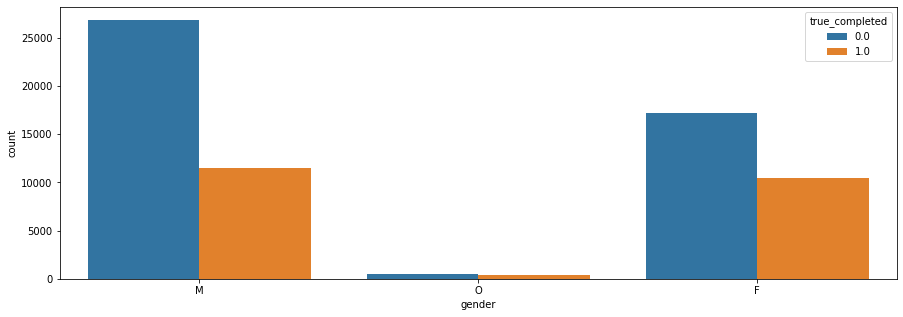

In [82]:
plt.figure(figsize = (15,5))
sns.countplot(data = final, x = 'gender', hue = 'true_completed')
plt.show()

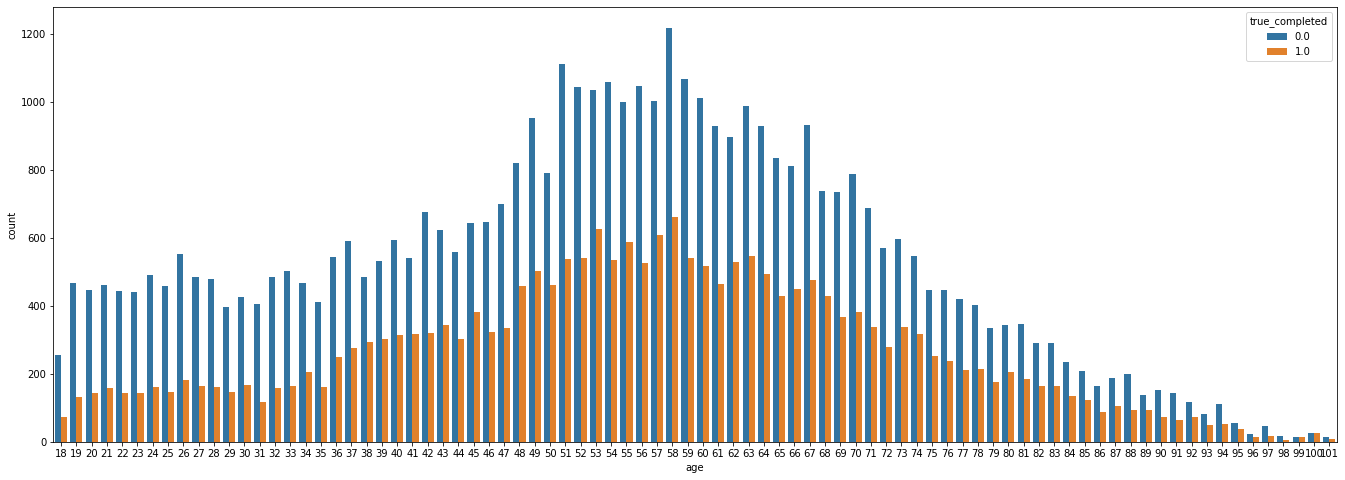

In [83]:
plt.figure(figsize = (23,8))
sns.countplot(data = final, x = 'age', hue = 'true_completed')
plt.show()

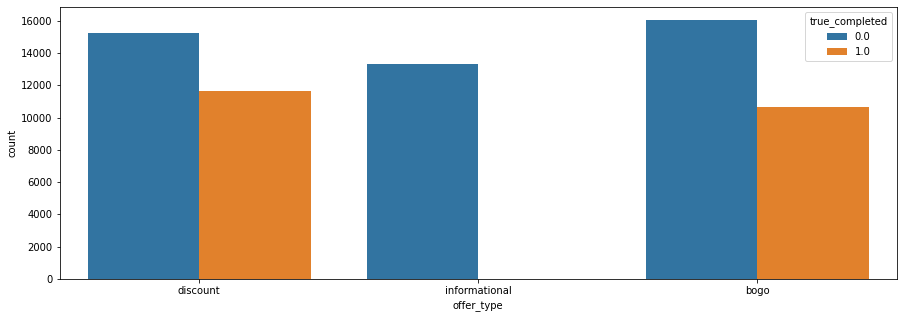

In [84]:
plt.figure(figsize = (15,5))
sns.countplot(data = final, x = 'offer_type', hue = 'true_completed')
plt.show()

In [85]:
pd.crosstab(final.true_completed, final.offer_type)

offer_type,bogo,discount,informational
true_completed,,,
0.0,16053,15265,13300
1.0,10642,11677,0


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [109]:
X = final.drop(['true_completed','person','offer_id'], axis = 1)
y = final.true_completed

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 0)

In [125]:
# Random Forest Classifier
dtc = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(n_estimators = 100, random_state = 0)
lr = LogisticRegression(solver = 'liblinear', random_state = 0)

In [126]:
dtc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [127]:
def model_performance(model, X_test, y_test):
    y_predict = model.predict(X_test)
    return accuracy_score(y_predict, y_test), f1_score(y_test, y_predict)

In [129]:
models = [dtc, rfc, lr]
for model in models:
    metrics_scores = model_performance(model, X_test, y_test)
    print('The ' + model.__class__.__name__ + 'model got an accuracy score of: ' + str(metrics_scores[0]))
    print('The ' + model.__class__.__name__ + 'model got an F1_score score of: ' + str(metrics_scores[1]))
    

The DecisionTreeClassifiermodel got an accuracy score of: 1.0
The DecisionTreeClassifiermodel got an F1_score score of: 1.0
The RandomForestClassifiermodel got an accuracy score of: 1.0
The RandomForestClassifiermodel got an F1_score score of: 1.0
The LogisticRegressionmodel got an accuracy score of: 0.9994024499551838
The LogisticRegressionmodel got an F1_score score of: 0.9991122947181535


In [ ]:
dinero gastado en ofertas que sí se completaron correctamente, dinero gastado sin haber completado la oferta